In [7]:
import json
import os 

dirs = [
 't_8C_5000IPOS',
 't_4C_5000IPOS',
 't_2C_5000IPOS',
 't_4C_3000IPOS',
 't_4C_1000IPOS',
 't_2C_1000IPOS',
 't_2C_100IPOS',
 't_4C_100IPOS',
 't_8C_100IPOS',
  't_2C_100IPOS_dblim',
 't_4C_100IPOS_dblim',
 't_8C_100IPOS_dblim'
 
 ]

res = {}

for i in dirs:
    with open(f"./results/{i}/results.json", "r") as f:
        js = json.loads(f.read())
    res[i] = js["rawData"]



In [12]:
os.listdir("./results")

['20241207132555',
 '20241207133655',
 '20241207133754',
 '20241207133809',
 '20241207141123',
 '20241207142940',
 '20241207143026',
 '20241207143443',
 't_8C_5000IPOS',
 't_4C_5000IPOS',
 't_2C_5000IPOS',
 't_4C_3000IPOS',
 't_4C_1000IPOS',
 't_2C_1000IPOS',
 't_2C_100IPOS',
 't_4C_100IPOS',
 't_8C_100IPOS',
 't_8C_200IPOS',
 't_4C_200IPOS',
 't_2C_200IPOS',
 't_2C_100IPOS_dblim',
 't_4C_100IPOS_dblim',
 't_8C_100IPOS_dblim']

In [8]:
def get_result(test_name,concurrency ):
    #                16,
    # 32,
    # 64,
    # 128,
    # 256,
    # 512):
    mapping = {
        16: 0,
        32: 1,
        64: 2,
        128: 3,
        256: 4,
        512: 5
    }
    

    result = {}
    for test in res:
        
        data = res[test]
        
        if concurrency not in mapping:
            raise Exception(f"Concurrency {concurrency} not found")
        
        index = mapping[concurrency]
        
        latent = data[test_name]["spring"][index]["latencyAvg"]
        std_latent = data[test_name]["spring"][index]["latencyStdev"]
        
        result[test] = {
            "avg":float(latent.replace("ms", "")),
            "std": float(std_latent.replace("ms", "")) 
        }
    return result

result = get_result("json", 512)


In [70]:
def pick_result(data, labels):
    # pick labels in data, in sequence
    return {k: data[k] for k in labels}


def render(data, labels, name = "Default Title"):
    def render_single(data_input):
        labels = list(data_input.keys())
        # fake data using numpy, generate based on std
        simulated_data =  [np.random.normal(v["avg"], v["std"]/5, 100) for v in data_input.values()]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(7, 4))

        # Plot avg values using violinplot
        ax.violinplot(simulated_data, showmeans=False, showmedians=True, vert=False)

        # Add labels and title
        y_pos = np.arange(len(labels)) +1
        ax.set_yticks(y_pos)
        
        labels = list(map(lambda x: x.replace("t_", "").replace("C_", "C/").replace("IPOS", "IOPS"), labels))
        ax.set_yticklabels(labels)
        ax.set_xlabel('Latency (ms)')
        ax.set_ylabel('Test')
        ax.set_title(name)

        plt.show()
    data_input = pick_result(data, labels)
    render_single(data_input)
    
list(filter(lambda x: "5000IPOS" in x ,dirs))

['t_8C_5000IPOS', 't_4C_5000IPOS', 't_2C_5000IPOS']

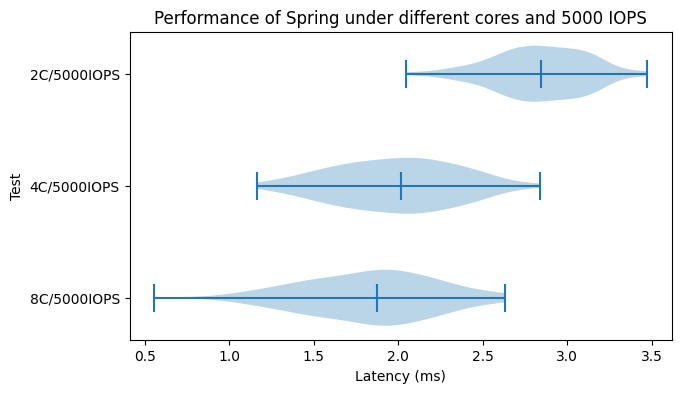

In [71]:
render(result, [
    't_8C_5000IPOS', 't_4C_5000IPOS', 't_2C_5000IPOS'
    ],
       "Performance of Spring under different cores and 5000 IOPS"
       )

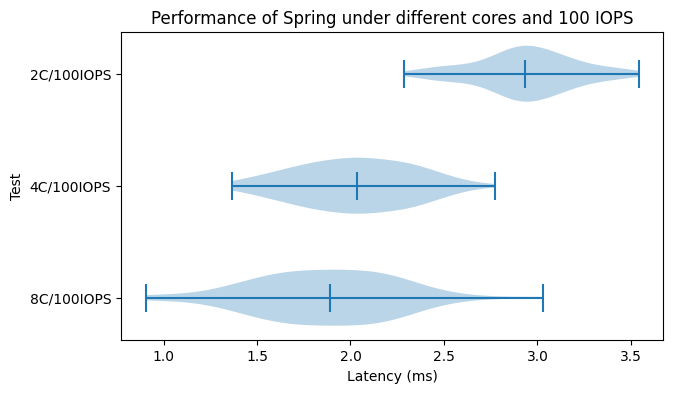

In [72]:
render(result, [
    't_8C_100IPOS', 't_4C_100IPOS', 't_2C_100IPOS'
    ],
       "Performance of Spring under different cores and 100 IOPS"
       )

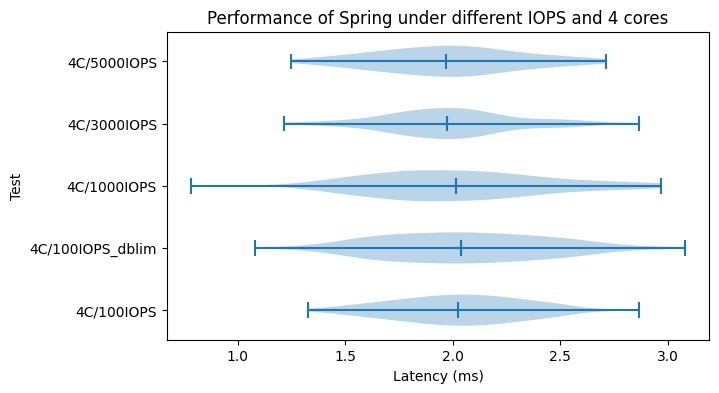

In [ ]:
render(result, [
    't_4C_100IPOS', 't_4C_100IPOS_dblim', 't_4C_1000IPOS', 't_4C_3000IPOS', 't_4C_5000IPOS'
    ],
       "Performance of Spring under different IOPS and 4 cores (a)"
       )

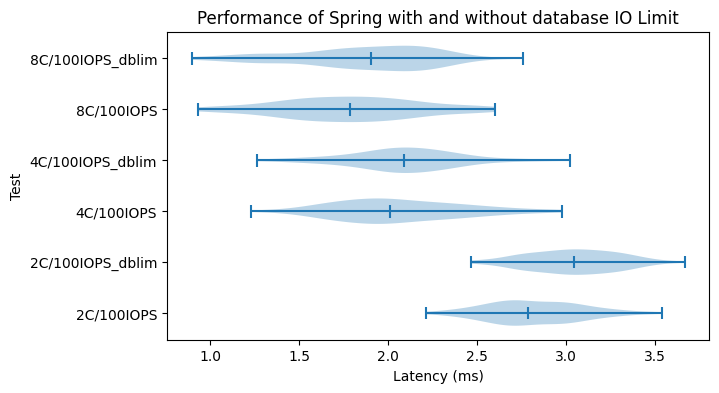

In [78]:
render(result, [
    't_2C_100IPOS', 't_2C_100IPOS_dblim', 't_4C_100IPOS', 't_4C_100IPOS_dblim', 't_8C_100IPOS', 't_8C_100IPOS_dblim'
    ],
       "Performance of Spring with and without database IO Limit"
       )